# Predicting Solubility

## Importing files and prepping dataframes

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2,f_regression,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score
import numpy as np

In [2]:
from google.colab import files
files.upload()


Saving sol_descriptors.csv to sol_descriptors.csv


{'sol_descriptors.csv': b'"ID","Name","SMILES","Solubility","Solubility_toggle","SlogP","SMR","LabuteASA","TPSA","AMW","ExactMW","NumLipinskiHBA","NumLipinskiHBD","NumRotatableBonds","NumHBD","NumHBA","NumAmideBonds","NumHeteroAtoms","NumHeavyAtoms","NumAtoms","NumStereocenters","NumUnspecifiedStereocenters","NumRings","NumAromaticRings","NumSaturatedRings","NumAliphaticRings","NumAromaticHeterocycles","NumSaturatedHeterocycles","NumAliphaticHeterocycles","NumAromaticCarbocycles","NumSaturatedCarbocycles","NumAliphaticCarbocycles","FractionCSP3","Chi0v","Chi1v","Chi2v","Chi3v","Chi4v","Chi1n","Chi2n","Chi3n","Chi4n","HallKierAlpha","kappa1","kappa2","kappa3","slogp_VSA1","slogp_VSA2","slogp_VSA3","slogp_VSA4","slogp_VSA5","slogp_VSA6","slogp_VSA7","slogp_VSA8","slogp_VSA9","slogp_VSA10","slogp_VSA11","slogp_VSA12","smr_VSA1","smr_VSA2","smr_VSA3","smr_VSA4","smr_VSA5","smr_VSA6","smr_VSA7","smr_VSA8","smr_VSA9","smr_VSA10","peoe_VSA1","peoe_VSA2","peoe_VSA3","peoe_VSA4","peoe_VSA5","pe

In [3]:
df=pd.read_csv('sol_descriptors.csv')
df

ID                                               Name  \
0     A-356                                            ethanol   
1     A-385              sodium (methylcarbamothioyl)sulfanide   
2     A-441                          tetrabutylazanium bromide   
3     A-452  2-(4,5-diamino-1H-pyrazol-1-yl)ethan-1-ol; sul...   
4     A-453                   disodium benzene-1,3-disulfonate   
...     ...                                                ...   
6777   I-60                                      nortriptiline   
6778   I-65                                    phenazopyridine   
6779   I-80                                      sulfasalazine   
6780   I-83                                   sulindac_form_II   
6781   I-94                                           warfarin   

                                                 SMILES  Solubility  \
0                                                   CCO    1.233668   
1                                     [Na+].CNC([S-])=S    0.747325   
2                        [Br-].CCCC[N+](CCCC)(CCCC)CCCC    1.332025   
3                          Nc1cnn(CCO)c1N.O[S](O)(=O)=O    0.444259   
4     [Na+].[Na+].[O-][S](=O)(=O)c1cccc(c1)[S]([O-])...    0.370947   
...                                                 ...         ...   
6777                    N(CCC=C1c2c(CCc3c1cccc3)cccc2)C   -4.020000   
6778                        c1ccc(cc1)N=Nc1c(nc(cc1)N)N   -4.190000   
6779  C(=O)(O)c1cc(ccc1O)N=Nc1ccc(cc1)S(=O)(Nc1ccccn...   -6.140000   
6780      CC1=C(CC(O)=O)c2cc(F)ccc2C1=Cc1ccc(cc1)S(C)=O   -4.500000   
6781              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000   

      Solubility_toggle   SlogP       SMR   LabuteASA    TPSA      AMW  ...  \
0                     1 -0.0014   12.7598   19.898427   20.23   46.069  ...   
1                     1 -2.9584   29.0227   70.581302   12.03  129.185  ...   
2                     1  2.0076   79.3604  126.695890    0.00  322.375  ...   
3                     1 -1.6130   52.3150   85.880241  164.69  240.241  ...   
4                     1 -6.4972   42.3684  137.515474  114.40  282.206  ...   
...                 ...     ...       ...         ...     ...      ...  ...   
6777                  0  3.8264   85.9147  120.897520   12.03  263.384  ...   
6778                  0  2.6614   63.6798   92.834705   89.65  213.244  ...   
6779                  0  3.7016  100.7296  159.637587  141.31  398.400  ...   
6780                  0  4.3655   97.8922  147.518542   54.37  356.418  ...   
6781                  0  3.6096   87.7318  132.552025   67.51  308.333  ...   

      MQN33  MQN34  MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  MQN41  MQN42  
0         0      0      0      0      0      0      0      0      0      0  
1         0      0      0      0      0      0      0      0      0      0  
2         0      0      0      0      0      0      0      0      0      0  
3         0      0      1      0      0      0      0      0      0      0  
4         0      0      0      1      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
6777      0      0      0      2      1      0      0      0      4      2  
6778      0      0      0      2      0      0      0      0      0      0  
6779      0      0      0      3      0      0      0      0      0      0  
6780      0      0      1      2      0      0      0      0      2      1  
6781      0      0      0      3      0      0      0      0      2      1  

[6782 rows x 124 columns]

In [4]:
df_unscaled=df.drop(['ID','Name',"SMILES","Solubility",'Solubility_toggle'],axis='columns')
df_unscaled

SlogP       SMR   LabuteASA    TPSA      AMW     ExactMW  \
0    -0.0014   12.7598   19.898427   20.23   46.069   46.041865   
1    -2.9584   29.0227   70.581302   12.03  129.185  128.968285   
2     2.0076   79.3604  126.695890    0.00  322.375  321.203112   
3    -1.6130   52.3150   85.880241  164.69  240.241  240.052840   
4    -6.4972   42.3684  137.515474  114.40  282.206  281.924468   
...      ...       ...         ...     ...      ...         ...   
6777  3.8264   85.9147  120.897520   12.03  263.384  263.167400   
6778  2.6614   63.6798   92.834705   89.65  213.244  213.101445   
6779  3.7016  100.7296  159.637587  141.31  398.400  398.068491   
6780  4.3655   97.8922  147.518542   54.37  356.418  356.088244   
6781  3.6096   87.7318  132.552025   67.51  308.333  308.104859   

      NumLipinskiHBA  NumLipinskiHBD  NumRotatableBonds  NumHBD  ...  MQN33  \
0                  1               1                  0       1  ...      0   
1                  1               1                  0       1  ...      0   
2                  1               0                 12       0  ...      0   
3                  9               7                  2       5  ...      0   
4                  6               0                  2       0  ...      0   
...              ...             ...                ...     ...  ...    ...   
6777               1               1                  3       1  ...      0   
6778               5               4                  2       2  ...      0   
6779               9               3                  6       3  ...      0   
6780               3               1                  4       1  ...      0   
6781               4               1                  4       1  ...      0   

      MQN34  MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  MQN41  MQN42  
0         0      0      0      0      0      0      0      0      0  
1         0      0      0      0      0      0      0      0      0  
2         0      0      0      0      0      0      0      0      0  
3         0      1      0      0      0      0      0      0      0  
4         0      0      1      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  
6777      0      0      2      1      0      0      0      4      2  
6778      0      0      2      0      0      0      0      0      0  
6779      0      0      3      0      0      0      0      0      0  
6780      0      1      2      0      0      0      0      2      1  
6781      0      0      3      0      0      0      0      2      1  

[6782 rows x 119 columns]

In [5]:
## Scaling the descriptors
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_unscaled)
df_scaled=pd.DataFrame(df_scaled)
df_scaled

0         1         2         3         4         5         6    \
0    -0.480540 -1.048241 -1.070087 -0.621494 -1.099574 -1.099126 -0.737730   
1    -1.205729 -0.739155 -0.481381 -0.739482 -0.698899 -0.698736 -0.737730   
2     0.012157  0.217540  0.170416 -0.912578  0.232407  0.229422 -0.737730   
3    -0.875777 -0.296473 -0.303677  1.457097 -0.163534 -0.162392  1.169646   
4    -2.073602 -0.485513  0.296090  0.733489  0.038766  0.039775  0.454380   
...        ...       ...       ...       ...       ...       ...       ...   
6777  0.458209  0.342108  0.103065 -0.739482 -0.051969 -0.050789 -0.737730   
6778  0.172498 -0.080479 -0.222898  0.377369 -0.293678 -0.292520  0.215958   
6779  0.427602  0.623673  0.553049  1.120689  0.598899  0.600548  1.169646   
6780  0.590420  0.569746  0.412281 -0.130264  0.396518  0.397856 -0.260886   
6781  0.405040  0.376642  0.238438  0.058803  0.164716  0.166180 -0.022464   

           7         8         9    ...       109       110       111  \
0    -0.164890 -0.668365 -0.075282  ... -0.124252 -0.051995 -0.408277   
1    -0.164890 -0.668365 -0.075282  ... -0.124252 -0.051995 -0.408277   
2    -0.641770  1.209111 -0.700969  ... -0.124252 -0.051995 -0.408277   
3     2.696391 -0.355452  2.427466  ... -0.124252 -0.051995  1.604031   
4    -0.641770 -0.355452 -0.700969  ... -0.124252 -0.051995 -0.408277   
...        ...       ...       ...  ...       ...       ...       ...   
6777 -0.164890 -0.198996 -0.075282  ... -0.124252 -0.051995 -0.408277   
6778  1.265750 -0.355452  0.550405  ... -0.124252 -0.051995 -0.408277   
6779  0.788870  0.270373  1.176092  ... -0.124252 -0.051995 -0.408277   
6780 -0.164890 -0.042540 -0.075282  ... -0.124252 -0.051995  1.604031   
6781 -0.164890 -0.042540 -0.075282  ... -0.124252 -0.051995 -0.408277   

           112        113       114       115       116       117       118  
0    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
1    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
2    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
3    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
4    -0.150681  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
...        ...        ...       ...       ...       ...       ...       ...  
6777  0.489216  10.165975 -0.032969 -0.021037 -0.039341  1.413641  0.856818  
6778  0.489216  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
6779  1.129114  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
6780  0.489216  -0.089215 -0.032969 -0.021037 -0.039341  0.519886  0.290339  
6781  1.129114  -0.089215 -0.032969 -0.021037 -0.039341  0.519886  0.290339  

[6782 rows x 119 columns]

## Splitting into training and test datasets

In [6]:
y=df['Solubility_toggle']
y.value_counts()

1    3903
0    2879
Name: Solubility_toggle, dtype: int64

In [7]:
X_scaled=df_scaled.dropna(axis='columns')
X_scaled

0         1         2         3         4         5         6    \
0    -0.480540 -1.048241 -1.070087 -0.621494 -1.099574 -1.099126 -0.737730   
1    -1.205729 -0.739155 -0.481381 -0.739482 -0.698899 -0.698736 -0.737730   
2     0.012157  0.217540  0.170416 -0.912578  0.232407  0.229422 -0.737730   
3    -0.875777 -0.296473 -0.303677  1.457097 -0.163534 -0.162392  1.169646   
4    -2.073602 -0.485513  0.296090  0.733489  0.038766  0.039775  0.454380   
...        ...       ...       ...       ...       ...       ...       ...   
6777  0.458209  0.342108  0.103065 -0.739482 -0.051969 -0.050789 -0.737730   
6778  0.172498 -0.080479 -0.222898  0.377369 -0.293678 -0.292520  0.215958   
6779  0.427602  0.623673  0.553049  1.120689  0.598899  0.600548  1.169646   
6780  0.590420  0.569746  0.412281 -0.130264  0.396518  0.397856 -0.260886   
6781  0.405040  0.376642  0.238438  0.058803  0.164716  0.166180 -0.022464   

           7         8         9    ...       109       110       111  \
0    -0.164890 -0.668365 -0.075282  ... -0.124252 -0.051995 -0.408277   
1    -0.164890 -0.668365 -0.075282  ... -0.124252 -0.051995 -0.408277   
2    -0.641770  1.209111 -0.700969  ... -0.124252 -0.051995 -0.408277   
3     2.696391 -0.355452  2.427466  ... -0.124252 -0.051995  1.604031   
4    -0.641770 -0.355452 -0.700969  ... -0.124252 -0.051995 -0.408277   
...        ...       ...       ...  ...       ...       ...       ...   
6777 -0.164890 -0.198996 -0.075282  ... -0.124252 -0.051995 -0.408277   
6778  1.265750 -0.355452  0.550405  ... -0.124252 -0.051995 -0.408277   
6779  0.788870  0.270373  1.176092  ... -0.124252 -0.051995 -0.408277   
6780 -0.164890 -0.042540 -0.075282  ... -0.124252 -0.051995  1.604031   
6781 -0.164890 -0.042540 -0.075282  ... -0.124252 -0.051995 -0.408277   

           112        113       114       115       116       117       118  
0    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
1    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
2    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
3    -0.790578  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
4    -0.150681  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
...        ...        ...       ...       ...       ...       ...       ...  
6777  0.489216  10.165975 -0.032969 -0.021037 -0.039341  1.413641  0.856818  
6778  0.489216  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
6779  1.129114  -0.089215 -0.032969 -0.021037 -0.039341 -0.373870 -0.276140  
6780  0.489216  -0.089215 -0.032969 -0.021037 -0.039341  0.519886  0.290339  
6781  1.129114  -0.089215 -0.032969 -0.021037 -0.039341  0.519886  0.290339  

[6782 rows x 119 columns]

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled, y, test_size=0.2,shuffle=True)
## Feature Selection using F_regression scores

# configure to select a subset of features
fs = SelectKBest(score_func=f_regression, k=60)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

1    3136
0    2289
Name: Solubility_toggle, dtype: int64
1    767
0    590
Name: Solubility_toggle, dtype: int64


# Buildings Machine Learning Models
## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9393010423053341
0.9270449521002211


## 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=14,n_estimators=400,min_samples_leaf=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9576587795765877
0.9498894620486367


## 3) K-neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9504337050805453
0.9410464259395726


## 4) SVM classifier

In [ ]:
from sklearn.svm import SVC
model=SVC(C=9)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9631019387116948
0.9565217391304348


## 5) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8438202247191011
0.7951363301400147


## 6) SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(alpha=0.001,shuffle=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9321100917431193
0.918201915991157


## 7) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=9,min_samples_leaf=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9541745134965475
0.94620486366986


## Comparing F1 scores across models

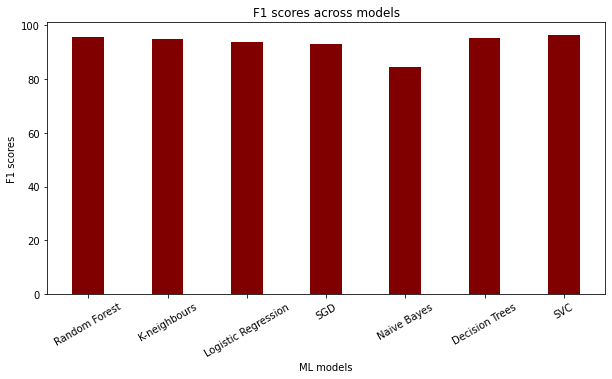

In [ ]:
# creating the dataset
data = {'Random Forest':95.77, 'K-neighbours':95.04, 'Logistic Regression':93.93,
        'SGD':93.21,'Naive Bayes':84.38,'Decision Trees':95.42,'SVC':96.31}
Classifiers = list(data.keys())
R2_scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Classifiers, R2_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("ML models")
plt.ylabel("F1 scores")
plt.title("F1 scores across models")
plt.xticks(rotation=30)
plt.show()

Support Vector Machines have the highest F1 score of **96.31 %**

## Predicting solubility of our compounds using SVM classifier

In [ ]:
from google.colab import files
files.upload()


Saving desciptors.csv to desciptors.csv


{'desciptors.csv': b'"Molecule ChEMBL ID","Molecule Name","Molecule Max Phase","Molecular Weight","#RO5 Violations","AlogP","Smiles","Standard Type","Standard Value","Standard Units","SlogP","SMR","LabuteASA","TPSA","AMW","ExactMW","NumLipinskiHBA","NumLipinskiHBD","NumRotatableBonds","NumHBD","NumHBA","NumAmideBonds","NumHeteroAtoms","NumHeavyAtoms","NumAtoms","NumStereocenters","NumUnspecifiedStereocenters","NumRings","NumAromaticRings","NumSaturatedRings","NumAliphaticRings","NumAromaticHeterocycles","NumSaturatedHeterocycles","NumAliphaticHeterocycles","NumAromaticCarbocycles","NumSaturatedCarbocycles","NumAliphaticCarbocycles","FractionCSP3","Chi0v","Chi1v","Chi2v","Chi3v","Chi4v","Chi1n","Chi2n","Chi3n","Chi4n","HallKierAlpha","kappa1","kappa2","kappa3","slogp_VSA1","slogp_VSA2","slogp_VSA3","slogp_VSA4","slogp_VSA5","slogp_VSA6","slogp_VSA7","slogp_VSA8","slogp_VSA9","slogp_VSA10","slogp_VSA11","slogp_VSA12","smr_VSA1","smr_VSA2","smr_VSA3","smr_VSA4","smr_VSA5","smr_VSA6","smr_

In [ ]:
df=pd.read_csv('desciptors.csv')
df1=df.drop(['Molecule ChEMBL ID','Molecule Name','Molecule Max Phase','Molecular Weight','#RO5 Violations','Smiles','Standard Type','Standard Value','Standard Units','AlogP','log_Standard Value'],axis='columns')
df1

SlogP       SMR   LabuteASA    TPSA      AMW     ExactMW  \
0     0.92720  132.1150  202.305969  161.30  476.545  476.239670   
1     2.93950  143.9170  228.312811  148.41  557.581  557.247456   
2     3.31940  118.4950  187.400905  123.05  457.460  457.183793   
3     2.43970  113.4510  172.704892  123.05  407.453  407.186987   
4     3.37440  127.2050  204.463982  145.17  502.501  502.205257   
...       ...       ...         ...     ...      ...         ...   
1001  0.40932   84.4731  128.248335   77.99  301.350  301.153875   
1002  1.08660   81.7434  140.308624   75.19  356.304  356.109625   
1003  4.59032  146.8939  216.956249   86.28  493.615  493.259009   
1004  1.11970   84.7381  140.744941   77.99  355.320  355.125609   
1005  2.14560  138.9384  227.019708  202.72  550.520  550.158745   

      NumLipinskiHBA  NumLipinskiHBD  NumRotatableBonds  NumHBD  ...  MQN33  \
0                 12               5                  5       3  ...      0   
1                 11               5                  6       3  ...      0   
2                  8               5                  4       3  ...      0   
3                  8               5                  4       3  ...      0   
4                 10               5                  6       3  ...      0   
...              ...             ...                ...     ...  ...    ...   
1001               7               3                  2       3  ...      0   
1002               7               2                  2       2  ...      0   
1003               8               2                  7       2  ...      0   
1004               7               3                  2       3  ...      0   
1005              12               7                  7       7  ...      0   

      MQN34  MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  MQN41  MQN42  
0         0      0      5      0      0      0      0      0      0  
1         1      0      4      0      0      0      0      0      0  
2         0      0      4      0      0      0      0      0      0  
3         0      0      4      0      0      0      0      0      0  
4         0      0      4      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  
1001      1      0      3      0      0      0      0      4      2  
1002      1      0      3      0      0      0      0      4      2  
1003      0      0      5      0      0      0      0      0      0  
1004      1      0      3      0      0      0      0      4      2  
1005      0      0      3      1      0      0      0      0      0  

[1006 rows x 119 columns]

In [ ]:
## Scaling the descriptors
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)
df1_scaled=pd.DataFrame(df1_scaled)
df1_scaled

0         1         2         3         4         5         6    \
0    -1.701411  0.419601  0.313207  0.822052  0.225265  0.226241  1.293495   
1    -0.204112  0.910472  0.956493  0.580337  1.009458  1.010337  0.945937   
2     0.078562 -0.146885 -0.055474  0.104784  0.040578  0.041794 -0.096736   
3    -0.576000 -0.356676 -0.418984  0.104784 -0.443345 -0.442139 -0.096736   
4     0.119486  0.215383  0.366586  0.519580  0.476444  0.477569  0.598380   
...        ...       ...       ...       ...       ...       ...       ...   
1001 -2.086752 -1.561932 -1.518629 -0.740186 -1.470114 -1.468462 -0.444293   
1002 -1.582806 -1.675466 -1.220314 -0.792692 -0.938319 -0.936531 -0.444293   
1003  1.024219  1.034288  0.675585 -0.584731  0.390453  0.390975 -0.096736   
1004 -1.558177 -1.550910 -1.209522 -0.740186 -0.947841 -0.946055 -0.444293   
1005 -0.794832  0.703401  0.924508  1.598764  0.941128  0.941723  1.293495   

           7         8         9    ...       109       110       111  \
0     0.681636 -0.052355 -0.059456  ... -0.100201 -0.189244 -1.073242   
1     0.681636  0.346656 -0.059456  ... -0.100201  4.570250 -1.073242   
2     0.681636 -0.451367 -0.059456  ... -0.100201 -0.189244 -1.073242   
3     0.681636 -0.451367 -0.059456  ... -0.100201 -0.189244 -1.073242   
4     0.681636  0.346656 -0.059456  ... -0.100201 -0.189244 -1.073242   
...        ...       ...       ...  ...       ...       ...       ...   
1001 -0.222419 -1.249391 -0.059456  ... -0.100201  4.570250 -1.073242   
1002 -0.674447 -1.249391 -0.534164  ... -0.100201  4.570250 -1.073242   
1003 -0.674447  0.745668 -0.534164  ... -0.100201 -0.189244 -1.073242   
1004 -0.222419 -1.249391 -0.059456  ... -0.100201  4.570250 -1.073242   
1005  1.585691  0.745668  1.839374  ... -0.100201 -0.189244 -1.073242   

           112       113       114  115       116       117       118  
0     1.962917 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
1     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
2     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
3     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
4     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
...        ...       ...       ...  ...       ...       ...       ...  
1001 -0.258337 -0.284674 -0.031544  0.0 -0.169204  0.358003  0.252019  
1002 -0.258337 -0.284674 -0.031544  0.0 -0.169204  0.358003  0.252019  
1003  1.962917 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
1004 -0.258337 -0.284674 -0.031544  0.0 -0.169204  0.358003  0.252019  
1005 -0.258337  3.250901 -0.031544  0.0 -0.169204 -0.761348 -0.693991  

[1006 rows x 119 columns]

### Predicting solubility (for target molecules)

In [ ]:
from sklearn.svm import SVC
model=SVC(C=9)
model.fit(X_train,y_train)
y_pred=model.predict(df1_scaled)


In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[  0 519]
 [  1 487]]


In [ ]:
y_pred=pd.DataFrame(y_pred)
df['Solubility']=y_pred
df

Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0         CHEMBL3975977           NaN                   0            476.55   
1         CHEMBL3952413           NaN                   0            557.58   
2         CHEMBL3949162           NaN                   0            457.46   
3         CHEMBL3895998           NaN                   0            407.45   
4         CHEMBL3905583           NaN                   0            502.50   
...                 ...           ...                 ...               ...   
1001      CHEMBL3356471           NaN                   0            301.35   
1002      CHEMBL3356468           NaN                   0            356.30   
1003          CHEMBL941      IMATINIB                   4            493.62   
1004      CHEMBL3356467           NaN                   0            355.32   
1005        CHEMBL60254       BALANOL                   0            550.52   

      #RO5 Violations  AlogP  \
0                 1.0   0.93   
1                 1.0   2.94   
2                 0.0   3.32   
3                 0.0   2.44   
4                 1.0   3.37   
...               ...    ...   
1001              0.0   0.41   
1002              0.0   1.09   
1003              0.0   4.59   
1004              0.0   1.12   
1005              2.0   2.15   

                                                 Smiles Standard Type  \
0     Nc1ncc(-c2ccnc(N3CCOCC3)n2)nc1C(=O)Nc1ncccc1N1...          IC50   
1     COC1CN(c2ccc(C(F)(F)F)c(-c3cnc(N)c(C(=O)Nc4ncc...          IC50   
2     Nc1ncc(-c2ccccc2C(F)(F)F)nc1C(=O)Nc1cnccc1N1CC...          IC50   
3        Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1          IC50   
4     CCC1(N)CCN(c2cccnc2NC(=O)c2nc(-c3ncccc3OC(F)(F...          IC50   
...                                                 ...           ...   
1001        Cc1cc2c(cc1NC1CNC1)N1C(=NNC(=O)[C@@H]1C)CO2          IC50   
1002      CC1C(=O)NN=C2COc3cc(C(F)(F)F)c(OC4CNC4)cc3N21          IC50   
1003  Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...          IC50   
1004      CC1C(=O)NN=C2COc3cc(C(F)(F)F)c(NC4CNC4)cc3N21          IC50   
1005  O=C(N[C@@H]1CNCCC[C@H]1OC(=O)c1cc(O)c(C(=O)c2c...          IC50   

      Standard Value Standard Units  ...  MQN35  MQN36  MQN37  MQN38  MQN39  \
0               0.29             nM  ...      0      5      0      0      0   
1               4.80             nM  ...      0      4      0      0      0   
2              50.00             nM  ...      0      4      0      0      0   
3               0.13             nM  ...      0      4      0      0      0   
4               0.60             nM  ...      0      4      0      0      0   
...              ...            ...  ...    ...    ...    ...    ...    ...   
1001         3000.00             nM  ...      0      3      0      0      0   
1002         3000.00             nM  ...      0      3      0      0      0   
1003       100000.00             nM  ...      0      5      0      0      0   
1004         2200.00             nM  ...      0      3      0      0      0   
1005           30.00             nM  ...      0      3      1      0      0   

      MQN40  MQN41  MQN42  log_Standard Value  Solubility  
0         0      0      0           -1.237874           1  
1         0      0      0            1.568616           1  
2         0      0      0            3.912023           1  
3         0      0      0           -2.040221           1  
4         0      0      0           -0.510826           1  
...     ...    ...    ...                 ...         ...  
1001      0      4      2            8.006368           1  
1002      0      4      2            8.006368           1  
1003      0      0      0           11.512925           0  
1004      0      4      2            7.696213           1  
1005      0      0      0            3.401197           1  

[1006 rows x 131 columns]

Here, 0-> unsoluble
<br>1-> soluble

In [ ]:
from google.colab import files
files.upload()

Saving tox1_toggle.csv to tox1_toggle.csv


{'tox1_toggle.csv': b'0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n1\n0\n0\n1\n0\n0\n0\n1\n1\n1\n0\n0\n0\n0\n1\n0\n1\n0\n0\n1\n0\n1\n1\n1\n1\n1\n1\n1\n1\n1\n1\n0\n0\n1\n1\n0\n0\n1\n1\n0\n0\n1\n1\n0\n1\n0\n1\n1\n0\n1\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n0\n1\n1\n0\n0\n1\n0\n0\n1\n0\n1\n1\n1\n0\n0\n1\n1\n1\n1\n1\n1\n1\n0\n0\n0\n1\n0\n0\n1\n0\n0\n0\n1\n1\n1\n1\n1\n0\n0\n0\n0\n1\n1\n0\n0\n0\n0\n0\n0\n0\n1\n0\n1\n1\n0\n0\n1\n0\n0\n0\n1\n1\n1\n1\n1\n1\n1\n0\n1\n1\n0\n0\n0\n0\n1\n1\n0\n0\n0\n0\n1\n1\n1\n0\n0\n0\n0\n1\n1\n0\n1\n1\n0\n1\n0\n1\n0\n1\n1\n0\n1\n0\n1\n1\n0\n0\n1\n1\n1\n0\n0\n0\n1\n0\n1\n0\n1\n0\n1\n0\n1\n1\n0\n0\n1\n1\n0\n0\n0\n0\n1\n0\n0\n1\n1\n0\n0\n0\n0\n0\n1\n1\n0\n0\n0\n1\n1\n0\n0\n0\n0\n0\n0\n0\n1\n0\n0\n0\n1\n1\n1\n0\n0\n0\n0\n1\n0\n0\n0\n1\n1\n0\n0\n0\n0\n0\n0\n0\n0\n1\n1\n0\n0\n0\n0\n0\n0\n1\n1\n0\n0\n1\n1\n0\n1\n0\n1\n1\n1\n0\n0\n0\n1\n0\n0\n0\n0\n0\n1\n1\n0\n0\n1\n0\n1\n0\n0\n0\n1\n1\n0\n1\n1\n0\n1\n0\n1\n0\n1\n1\n0\n0\n1\n1\n1\n1\n0\n1\n0\n0\n0\n1\n0\n0\n0\n0\n

In [ ]:
tox=pd.read_csv('tox1_toggle.csv')
df['Toxicity']=tox
df


Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0         CHEMBL3975977           NaN                   0            476.55   
1         CHEMBL3952413           NaN                   0            557.58   
2         CHEMBL3949162           NaN                   0            457.46   
3         CHEMBL3895998           NaN                   0            407.45   
4         CHEMBL3905583           NaN                   0            502.50   
...                 ...           ...                 ...               ...   
1001      CHEMBL3356471           NaN                   0            301.35   
1002      CHEMBL3356468           NaN                   0            356.30   
1003          CHEMBL941      IMATINIB                   4            493.62   
1004      CHEMBL3356467           NaN                   0            355.32   
1005        CHEMBL60254       BALANOL                   0            550.52   

      #RO5 Violations  AlogP  \
0                 1.0   0.93   
1                 1.0   2.94   
2                 0.0   3.32   
3                 0.0   2.44   
4                 1.0   3.37   
...               ...    ...   
1001              0.0   0.41   
1002              0.0   1.09   
1003              0.0   4.59   
1004              0.0   1.12   
1005              2.0   2.15   

                                                 Smiles Standard Type  \
0     Nc1ncc(-c2ccnc(N3CCOCC3)n2)nc1C(=O)Nc1ncccc1N1...          IC50   
1     COC1CN(c2ccc(C(F)(F)F)c(-c3cnc(N)c(C(=O)Nc4ncc...          IC50   
2     Nc1ncc(-c2ccccc2C(F)(F)F)nc1C(=O)Nc1cnccc1N1CC...          IC50   
3        Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1          IC50   
4     CCC1(N)CCN(c2cccnc2NC(=O)c2nc(-c3ncccc3OC(F)(F...          IC50   
...                                                 ...           ...   
1001        Cc1cc2c(cc1NC1CNC1)N1C(=NNC(=O)[C@@H]1C)CO2          IC50   
1002      CC1C(=O)NN=C2COc3cc(C(F)(F)F)c(OC4CNC4)cc3N21          IC50   
1003  Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...          IC50   
1004      CC1C(=O)NN=C2COc3cc(C(F)(F)F)c(NC4CNC4)cc3N21          IC50   
1005  O=C(N[C@@H]1CNCCC[C@H]1OC(=O)c1cc(O)c(C(=O)c2c...          IC50   

      Standard Value Standard Units  ...  MQN36  MQN37  MQN38  MQN39  MQN40  \
0               0.29             nM  ...      5      0      0      0      0   
1               4.80             nM  ...      4      0      0      0      0   
2              50.00             nM  ...      4      0      0      0      0   
3               0.13             nM  ...      4      0      0      0      0   
4               0.60             nM  ...      4      0      0      0      0   
...              ...            ...  ...    ...    ...    ...    ...    ...   
1001         3000.00             nM  ...      3      0      0      0      0   
1002         3000.00             nM  ...      3      0      0      0      0   
1003       100000.00             nM  ...      5      0      0      0      0   
1004         2200.00             nM  ...      3      0      0      0      0   
1005           30.00             nM  ...      3      1      0      0      0   

      MQN41  MQN42  log_Standard Value  Solubility  Toxicity  
0         0      0           -1.237874           1         0  
1         0      0            1.568616           1         0  
2         0      0            3.912023           1         0  
3         0      0           -2.040221           1         0  
4         0      0           -0.510826           1         0  
...     ...    ...                 ...         ...       ...  
1001      4      2            8.006368           1         1  
1002      4      2            8.006368           1         0  
1003      0      0           11.512925           0         0  
1004      4      2            7.696213           1         0  
1005      0      0            3.401197           1         0  

[1006 rows x 132 columns]

## To eliminate compounds which are toxic and/or insoluble

In [ ]:
df1=df[df['Toxicity']==0]
df2=df1[df1['Solubility']==1]
df2

Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0         CHEMBL3975977           NaN                   0            476.55   
1         CHEMBL3952413           NaN                   0            557.58   
2         CHEMBL3949162           NaN                   0            457.46   
3         CHEMBL3895998           NaN                   0            407.45   
4         CHEMBL3905583           NaN                   0            502.50   
...                 ...           ...                 ...               ...   
996        CHEMBL300422           NaN                   0            493.47   
997       CHEMBL3355112           NaN                   0            369.35   
1002      CHEMBL3356468           NaN                   0            356.30   
1004      CHEMBL3356467           NaN                   0            355.32   
1005        CHEMBL60254       BALANOL                   0            550.52   

      #RO5 Violations  AlogP  \
0                 1.0   0.93   
1                 1.0   2.94   
2                 0.0   3.32   
3                 0.0   2.44   
4                 1.0   3.37   
...               ...    ...   
996               1.0   2.43   
997               0.0   1.51   
1002              0.0   1.09   
1004              0.0   1.12   
1005              2.0   2.15   

                                                 Smiles Standard Type  \
0     Nc1ncc(-c2ccnc(N3CCOCC3)n2)nc1C(=O)Nc1ncccc1N1...          IC50   
1     COC1CN(c2ccc(C(F)(F)F)c(-c3cnc(N)c(C(=O)Nc4ncc...          IC50   
2     Nc1ncc(-c2ccccc2C(F)(F)F)nc1C(=O)Nc1cnccc1N1CC...          IC50   
3        Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1          IC50   
4     CCC1(N)CCN(c2cccnc2NC(=O)c2nc(-c3ncccc3OC(F)(F...          IC50   
...                                                 ...           ...   
996   O=C(OC1CNCC1Cc1ccc(O)cc1)c1cc(O)c(C(=O)c2c(O)c...          IC50   
997   C[C@@H]1C(=O)NN=C2COc3cc(C(F)(F)F)c(NC4(C)CNC4...          IC50   
1002      CC1C(=O)NN=C2COc3cc(C(F)(F)F)c(OC4CNC4)cc3N21          IC50   
1004      CC1C(=O)NN=C2COc3cc(C(F)(F)F)c(NC4CNC4)cc3N21          IC50   
1005  O=C(N[C@@H]1CNCCC[C@H]1OC(=O)c1cc(O)c(C(=O)c2c...          IC50   

      Standard Value Standard Units  ...  MQN36  MQN37  MQN38  MQN39  MQN40  \
0               0.29             nM  ...      5      0      0      0      0   
1               4.80             nM  ...      4      0      0      0      0   
2              50.00             nM  ...      4      0      0      0      0   
3               0.13             nM  ...      4      0      0      0      0   
4               0.60             nM  ...      4      0      0      0      0   
...              ...            ...  ...    ...    ...    ...    ...    ...   
996           260.00             nM  ...      3      0      0      0      0   
997          1700.00             nM  ...      3      0      0      0      0   
1002         3000.00             nM  ...      3      0      0      0      0   
1004         2200.00             nM  ...      3      0      0      0      0   
1005           30.00             nM  ...      3      1      0      0      0   

      MQN41  MQN42  log_Standard Value  Solubility  Toxicity  
0         0      0           -1.237874           1         0  
1         0      0            1.568616           1         0  
2         0      0            3.912023           1         0  
3         0      0           -2.040221           1         0  
4         0      0           -0.510826           1         0  
...     ...    ...                 ...         ...       ...  
996       0      0            5.560682           1         0  
997       4      2            7.438384           1         0  
1002      4      2            8.006368           1         0  
1004      4      2            7.696213           1         0  
1005      0      0            3.401197           1         0  

[298 rows x 132 columns]

By considering solubility and toxicity of compounds , we eliminated **708** compounds out of 1006 which is around **70%** elimination.

### Predicting solubility for generated molecules

In [10]:
from google.colab import files
files.upload()

Saving gen_mols_descriptors.csv to gen_mols_descriptors.csv


{'gen_mols_descriptors.csv': b'"Smiles","SlogP","SMR","LabuteASA","TPSA","AMW","ExactMW","NumLipinskiHBA","NumLipinskiHBD","NumRotatableBonds","NumHBD","NumHBA","NumAmideBonds","NumHeteroAtoms","NumHeavyAtoms","NumAtoms","NumStereocenters","NumUnspecifiedStereocenters","NumRings","NumAromaticRings","NumSaturatedRings","NumAliphaticRings","NumAromaticHeterocycles","NumSaturatedHeterocycles","NumAliphaticHeterocycles","NumAromaticCarbocycles","NumSaturatedCarbocycles","NumAliphaticCarbocycles","FractionCSP3","Chi0v","Chi1v","Chi2v","Chi3v","Chi4v","Chi1n","Chi2n","Chi3n","Chi4n","HallKierAlpha","kappa1","kappa2","kappa3","slogp_VSA1","slogp_VSA2","slogp_VSA3","slogp_VSA4","slogp_VSA5","slogp_VSA6","slogp_VSA7","slogp_VSA8","slogp_VSA9","slogp_VSA10","slogp_VSA11","slogp_VSA12","smr_VSA1","smr_VSA2","smr_VSA3","smr_VSA4","smr_VSA5","smr_VSA6","smr_VSA7","smr_VSA8","smr_VSA9","smr_VSA10","peoe_VSA1","peoe_VSA2","peoe_VSA3","peoe_VSA4","peoe_VSA5","peoe_VSA6","peoe_VSA7","peoe_VSA8","peoe_V

In [12]:
df1=pd.read_csv('gen_mols_descriptors.csv')
df1=df1.drop('Smiles',axis='columns')

## Scaling the descriptors
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)
df1_scaled=pd.DataFrame(df1_scaled)
df1_scaled

0         1         2         3         4         5         6    \
0   0.025801  1.126417  1.168095  1.067493  1.329513  1.328679  1.453444   
1   0.556486  1.801901  1.537147  0.292054  1.325886  1.329507  0.782624   
2   1.729364  0.880436  0.840714 -0.565349  0.823879  0.819230 -0.223607   
3  -1.977062  0.703563  0.879595  2.378928  0.975946  0.979871  1.788854   
4   0.513879  0.065302  0.159999 -0.565349  0.197397  0.192744 -0.223607   
5  -1.153049 -1.077015 -1.159208 -0.344308 -1.285428 -1.281997 -0.559017   
6  -0.683640  0.108859  0.230399  1.025674  0.100148  0.103779  0.782624   
7  -0.800958 -1.615581 -1.662473 -0.715658 -1.777431 -1.774063 -0.894427   
8  -0.126515 -0.352316 -0.171665 -0.128284 -0.003174 -0.004034  0.111803   
9   0.862078 -0.146691 -0.212394 -0.301055 -0.334017 -0.334726 -0.559017   
10 -0.095065 -1.510662 -1.590921 -1.512603 -1.367768 -1.372864 -1.900658   
11  1.148682  0.015787 -0.019288 -0.631542  0.015048  0.013874 -0.559017   

         7         8         9    ...  109  110       111       112  113  114  \
0  -0.162938  1.312785 -0.053683  ...  0.0  0.0 -0.282843 -0.242536  0.0  0.0   
1  -0.162938  1.021055 -0.053683  ...  0.0  0.0 -1.131371  1.940285  0.0  0.0   
2  -0.814688  2.187975 -0.697877  ...  0.0  0.0 -1.131371  0.485071  0.0  0.0   
3   3.095815 -0.729325  3.167286  ...  0.0  0.0  1.414214  0.485071  0.0  0.0   
4  -0.814688  0.145865 -0.697877  ...  0.0  0.0 -0.282843  0.485071  0.0  0.0   
5   0.488813 -0.729325 -0.053683  ...  0.0  0.0  0.565685 -0.970143  0.0  0.0   
6  -0.162938 -0.729325 -0.697877  ...  0.0  0.0 -0.282843  1.212678  0.0  0.0   
7  -0.162938 -1.021055 -0.053683  ...  0.0  0.0 -0.282843 -0.970143  0.0  0.0   
8  -0.162938 -0.145865 -0.053683  ...  0.0  0.0  2.262742 -1.697749  0.0  0.0   
9  -0.162938 -0.145865 -0.053683  ...  0.0  0.0 -1.131371  0.485071  0.0  0.0   
10 -0.814688 -1.312785 -0.697877  ...  0.0  0.0 -0.282843 -0.970143  0.0  0.0   
11 -0.162938  0.145865 -0.053683  ...  0.0  0.0  0.565685 -0.242536  0.0  0.0   

    115  116       117       118  
0   0.0  0.0 -1.073030 -1.073030  
1   0.0  0.0 -0.315597 -0.315597  
2   0.0  0.0 -0.315597 -0.315597  
3   0.0  0.0  2.714136  2.714136  
4   0.0  0.0  0.441836  0.441836  
5   0.0  0.0 -0.315597 -0.315597  
6   0.0  0.0  1.199269  1.199269  
7   0.0  0.0 -0.315597 -0.315597  
8   0.0  0.0 -0.315597 -0.315597  
9   0.0  0.0 -1.073030 -1.073030  
10  0.0  0.0 -0.315597 -0.315597  
11  0.0  0.0 -0.315597 -0.315597  

[12 rows x 119 columns]

In [13]:
from sklearn.svm import SVC
model=SVC(C=9)
model.fit(X_train,y_train)
y_pred=model.predict(df1_scaled)


In [14]:
unique, counts = np.unique(y_pred, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[0 6]
 [1 6]]


In [15]:
y_pred=pd.DataFrame(y_pred)
df1['Solubility']=y_pred
df1

SlogP       SMR   LabuteASA    TPSA      AMW     ExactMW  \
0   4.13810  158.3742  243.737899  137.07  602.117  601.187416   
1   5.00000  179.1964  261.163234  104.62  601.711  601.280138   
2   6.90490  150.7917  228.280077   68.74  545.511  544.200796   
3   0.88520  145.3395  230.115908  191.95  562.535  562.169978   
4   4.93080  125.6647  196.139139   68.74  475.376  474.122546   
5   2.22350   90.4521  133.850767   77.99  309.373  309.158960   
6   2.98588  127.0074  199.463141  135.32  464.489  464.170922   
7   2.79534   73.8505  110.088387   62.45  254.293  254.116761   
8   3.89072  112.7914  180.479093   87.03  452.922  452.110998   
9   5.49632  119.1299  178.556027   79.80  415.884  415.119988   
10  3.94180   77.0847  113.466821   29.10  300.155  298.994576   
11  5.96180  124.1384  187.673802   65.97  454.962  454.114272   

    NumLipinskiHBA  NumLipinskiHBD  NumRotatableBonds  NumHBD  ...  MQN34  \
0               12               2                 10       2  ...      0   
1               10               2                  9       2  ...      0   
2                7               1                 13       1  ...      0   
3               13               7                  3       7  ...      0   
4                7               1                  6       1  ...      0   
5                6               3                  3       2  ...      0   
6               10               2                  3       1  ...      0   
7                5               2                  2       2  ...      0   
8                8               2                  5       2  ...      0   
9                6               2                  5       2  ...      0   
10               2               1                  1       1  ...      0   
11               6               2                  6       2  ...      0   

    MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  MQN41  MQN42  Solubility  
0       1      3      0      0      0      0      0      0           0  
1       0      6      0      0      0      0      2      1           1  
2       0      4      0      0      0      0      2      1           0  
3       3      4      0      0      0      0     10      5           1  
4       1      4      0      0      0      0      4      2           1  
5       2      2      0      0      0      0      2      1           1  
6       1      5      0      0      0      0      6      3           1  
7       1      2      0      0      0      0      2      1           0  
8       4      1      0      0      0      0      2      1           1  
9       0      4      0      0      0      0      0      0           0  
10      1      2      0      0      0      0      2      1           0  
11      2      3      0      0      0      0      2      1           0  

[12 rows x 120 columns]